# Project Title : Bike Sharing Demand Prediction

## Problem Description
    Seoul is a bike sharing service in the city of Seoul, South Korea. It is part of the city's efforts to promote sustainable transportation and reduce traffic congestion. The service allows residents and visitors to rent bicycles at various stations across the city and return them to any other station, providing a convenient and eco-friendly mode of transportation. In recent years, the demand for bike rentals in Seoul has increased, leading to the need for a more efficient and effective way to manage the bike sharing operations. Accurately predicting bike demand is crucial for optimizing fleet management, ensuring the availability of bikes at high-demand locations, and reducing waste and costs.

    The main objective of this project is to develop a machine learning model that can accurately predict the demand for bike rentals in Seoul, South Korea, based on historical data and various relevant factors such as weather conditions, time of day, and public holidays. In this project we have used regression analysis techniques to model the bike demand data. The model trained on a large dataset of past bike rental information, along with relevant weather and time data. The model then be tested and evaluated using metrics such as mean squared error and r-squared values. The actual data is from the Seoul city government's open data portal, and this dataset is also available on Kaggle.

### Data Description
    The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
    Dataset link :-
                    https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction

### Attribute Information:
    Date : The date of the observation.
    Rented Bike Count : The number of bikes rented during the observation period.
    Hour : The hour of the day when the observation was taken.
    Temperature(°C) : The temperature in Celsius at the time of observation.
    Humidity(%) : The percentage of humidity at the time of observation.
    Wind speed (m/s) : The wind speed in meters per second at the time of observation.
    Visibility (10m) : The visibility in meters at the time of observation.
    Dew point temperature(°C) : The dew point temperature in Celsius at the time of observation.
    Solar Radiation (MJ/m2) : The amount of solar radiation in mega-joules per square meter at the time of observation.
    Rainfall(mm) : The amount of rainfall in millimeters during the observation period.
    Snowfall(cm) : The amount of snowfall in centimeters during the observation period.
    Seasons : The season of the year when the observation was taken.
    Holiday : Whether the observation was taken on a holiday or not.
    Functioning Day : Whether the bike sharing system was operating normally or not during the observation period.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [3]:
### Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
## Statistical info
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [5]:
## Check for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## Feature Engineering

In [3]:
# creating new features from Date feature
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Weekday'] = df['Date'].dt.day_name()
df['year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df.drop(columns=['Date'], inplace=True)

In [4]:
# create a feature name Weekend includes 0 or 1 where 0 means No Weekend and 1 means Weekend
df['Weekend'] = df['Weekday'].apply(lambda x: 0 if x not in ['Saturday', 'Sunday'] else 1)

In [8]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day Weekday  \
0           0.0            0.0  Winter  No Holiday             Yes  Friday   
1           0.0            0.0  Winter  No Holiday             Yes  Friday   
2           0.0            0.0  Winter  No Holiday             Yes  Friday   
3           0.0            0.0  Winter  No Holiday             Yes  Friday   
4           0.0            0.0  Winter  No Holiday             Yes  Friday   

   year  Day  Month  Weekend  
0  2017    1     12        0  
1  2017    1     12        0  
2  2017    1     12        0  
3  2017    1     12        0  
4  2017    1     12        0

### EDA

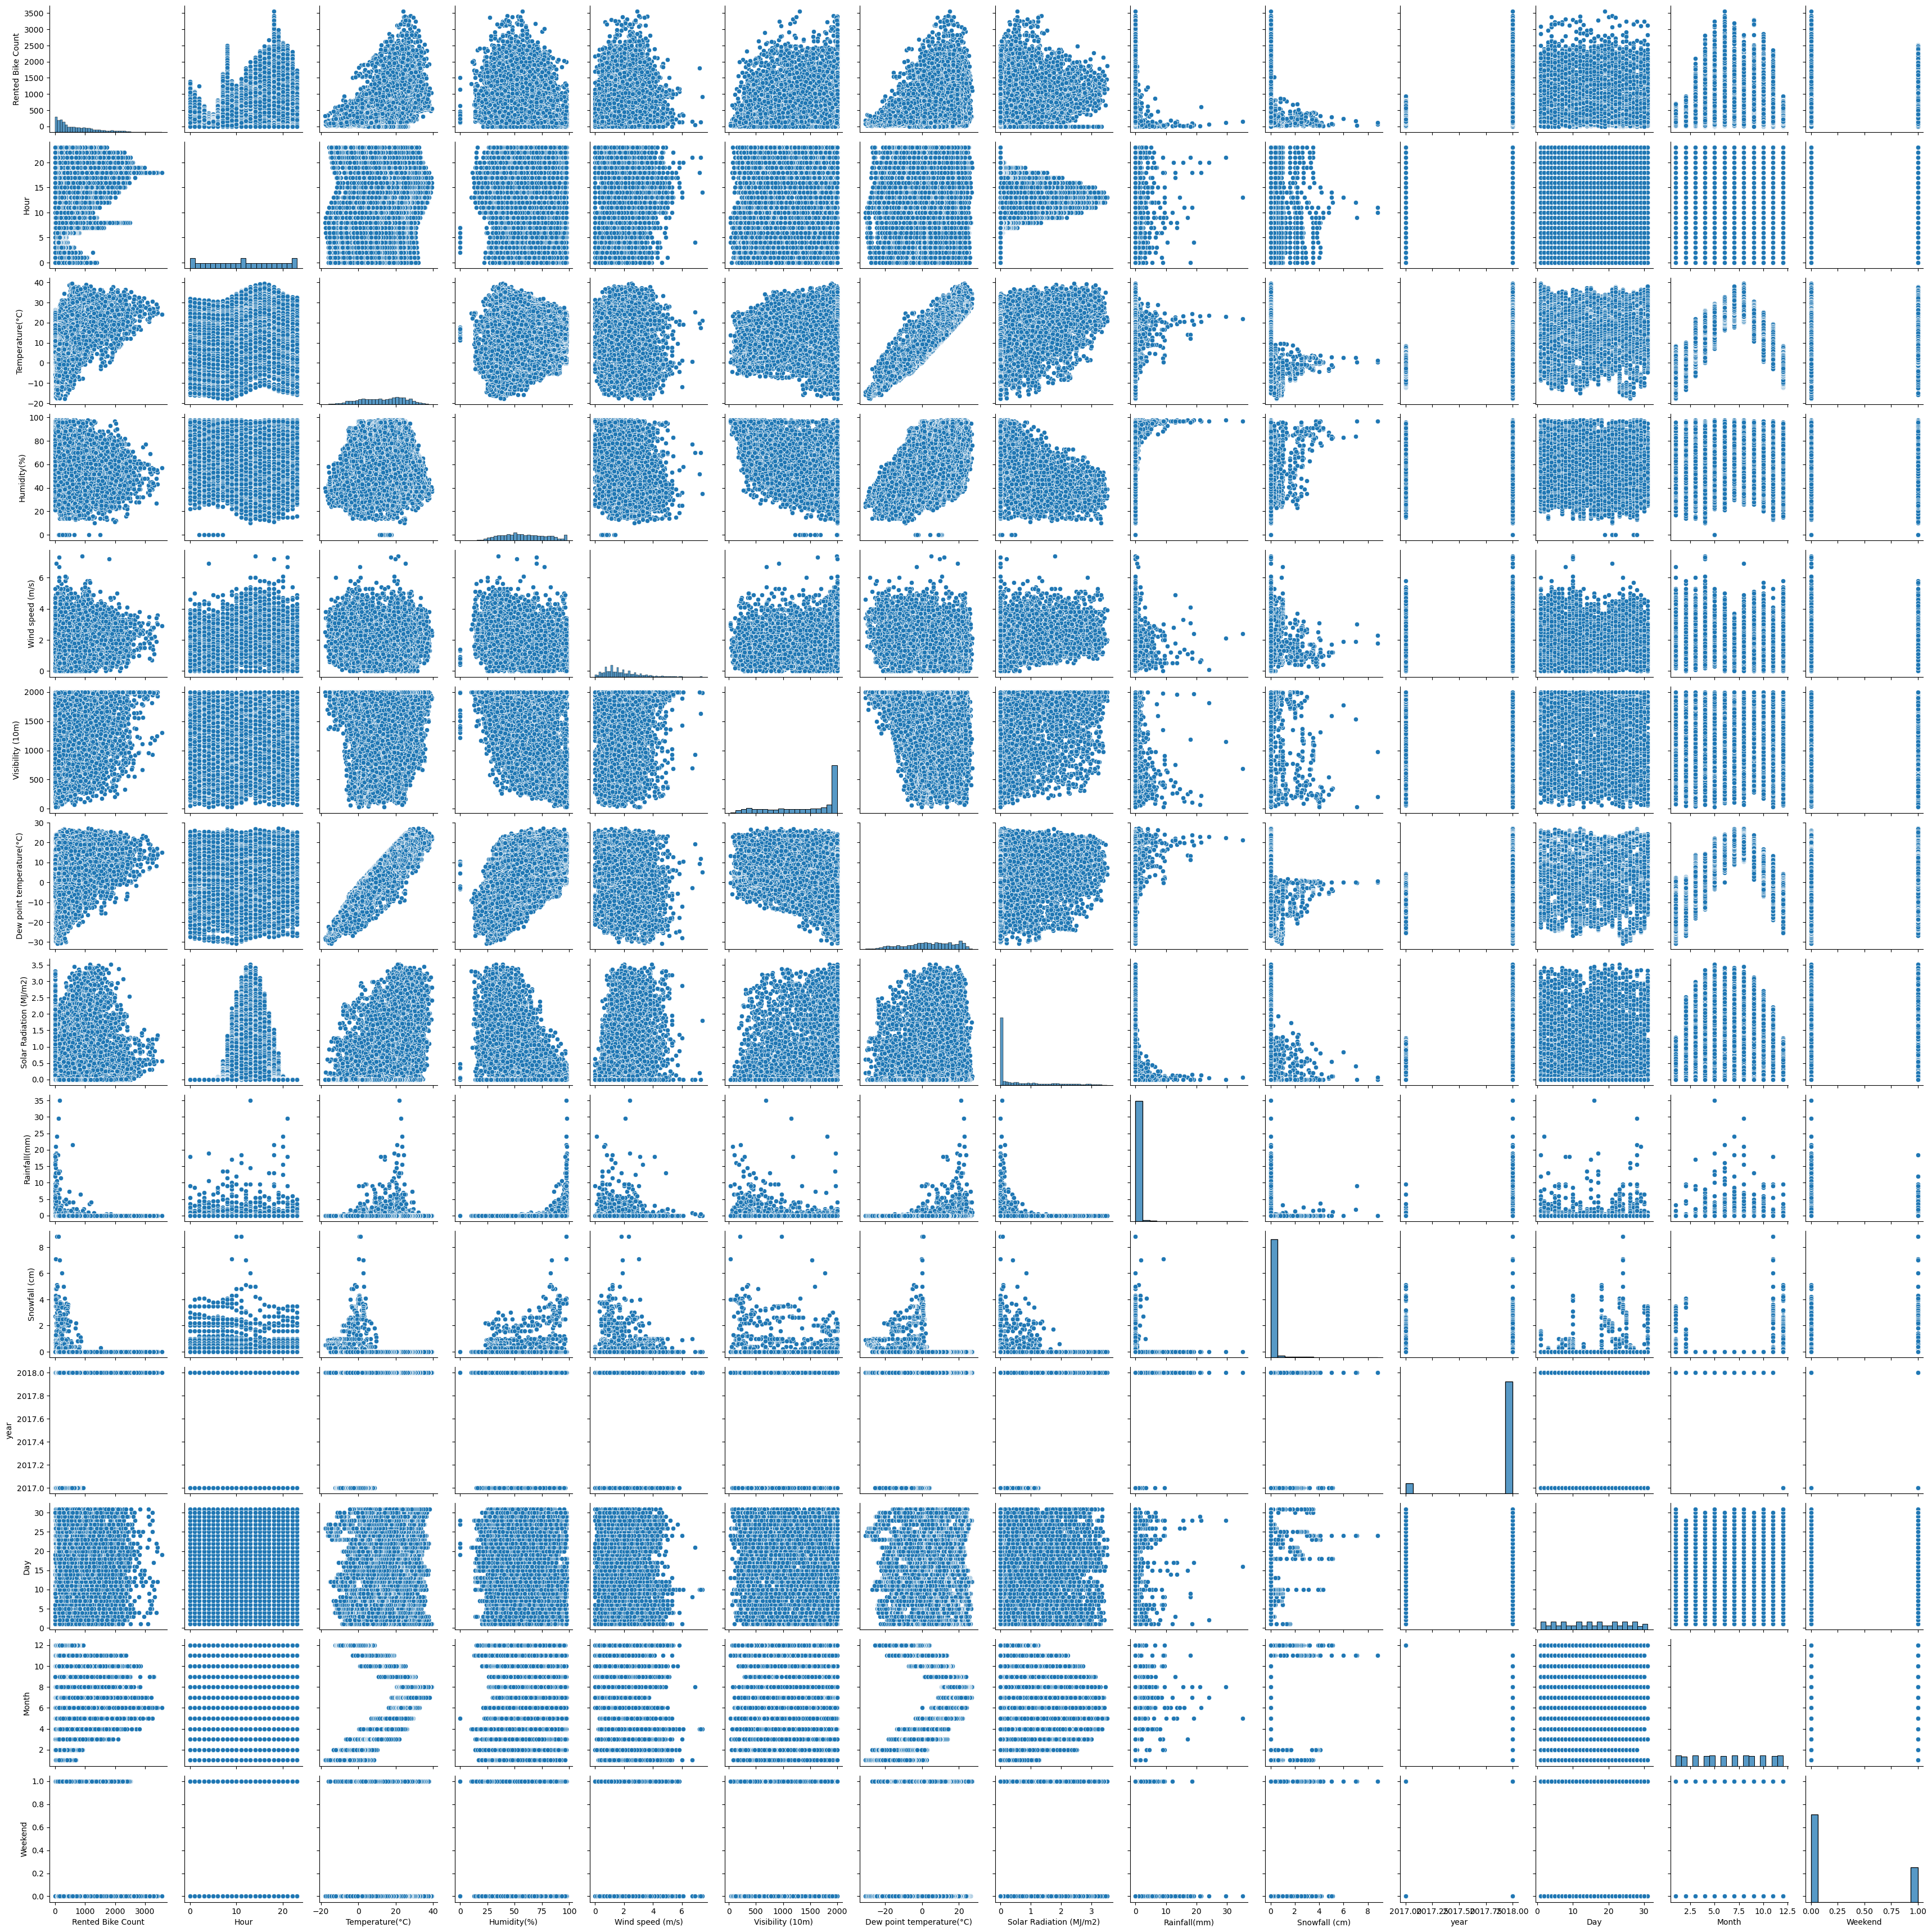

In [9]:
sns.pairplot(df)
plt.show()

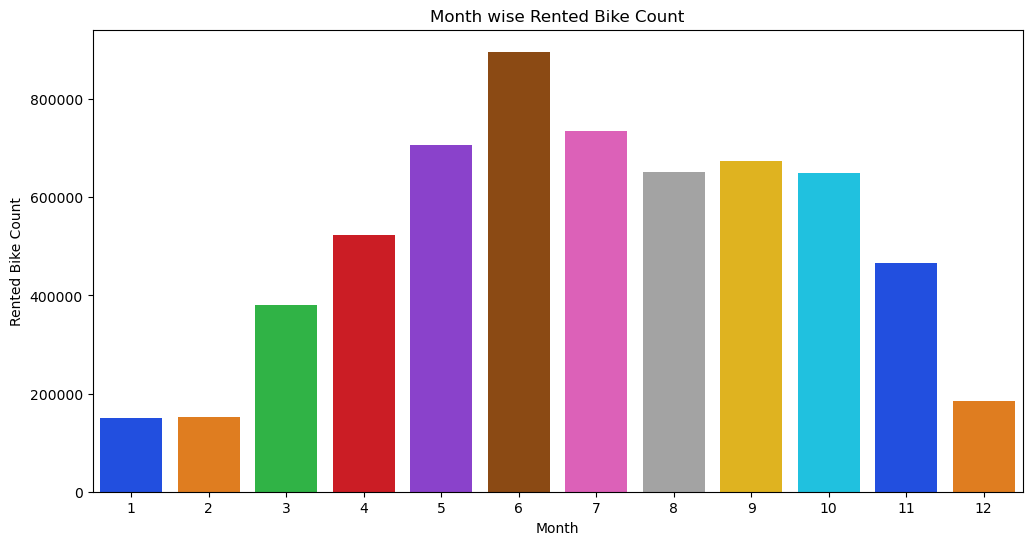

In [10]:
# Month wise Rented Bike Count
plt.figure(figsize=(12,6))
Month = df.groupby('Month').sum().reset_index()
sns.barplot(x="Month", y='Rented Bike Count', data=Month, palette='bright')
plt.title("Month wise Rented Bike Count")
plt.show()

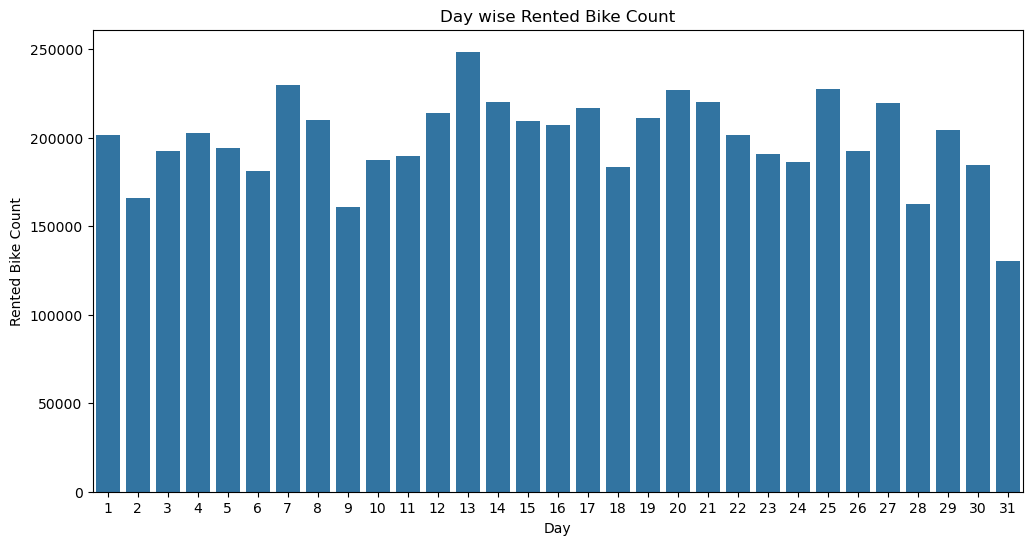

In [11]:
# Day wise Rented Bike Count
plt.figure(figsize=(12,6))
Day = df.groupby('Day').sum().reset_index()
sns.barplot(x="Day", y='Rented Bike Count', data=Day)
plt.title("Day wise Rented Bike Count")
plt.show()

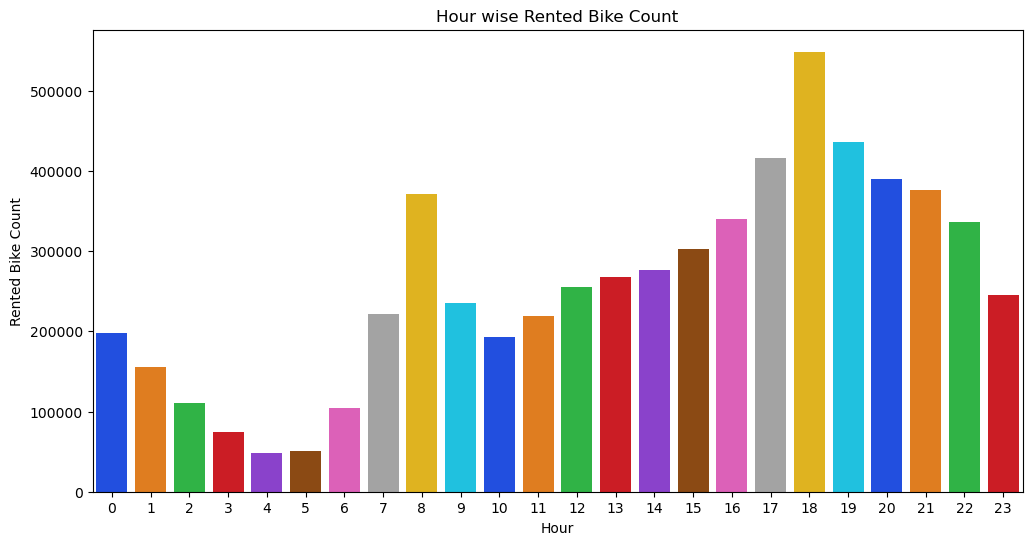

In [12]:
# Hour wise Rented Bike Count
plt.figure(figsize=(12,6))
Hour = df.groupby('Hour').sum().reset_index()
sns.barplot(x="Hour", y='Rented Bike Count', data=Hour, palette="bright")
plt.title("Hour wise Rented Bike Count")
plt.show()

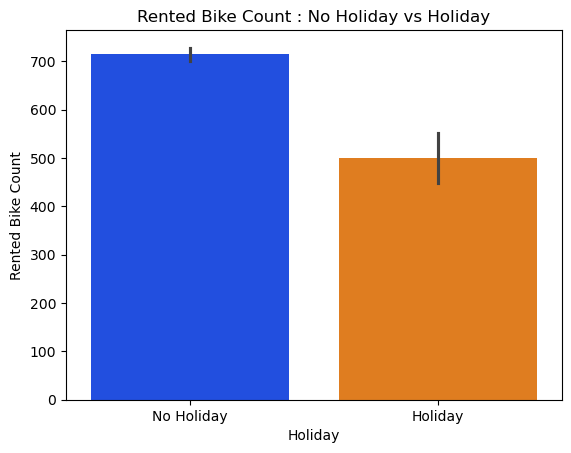

In [13]:
sns.barplot(x="Holiday", y='Rented Bike Count', data=df, palette="bright")
plt.title("Rented Bike Count : No Holiday vs Holiday")
plt.show()

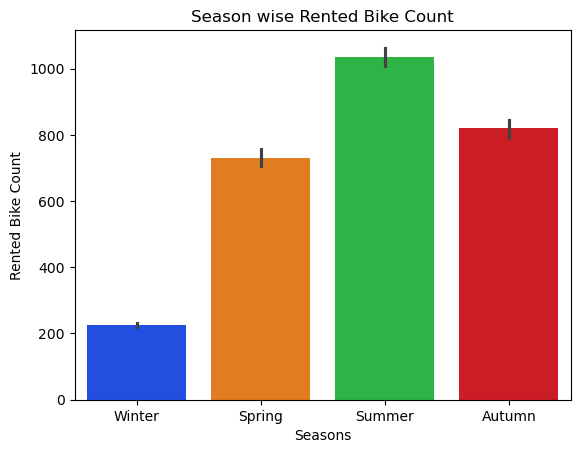

In [14]:
# Season wise Rented Bike Count
sns.barplot(x="Seasons", y='Rented Bike Count',data=df , palette="bright")
plt.title("Season wise Rented Bike Count")
plt.show()

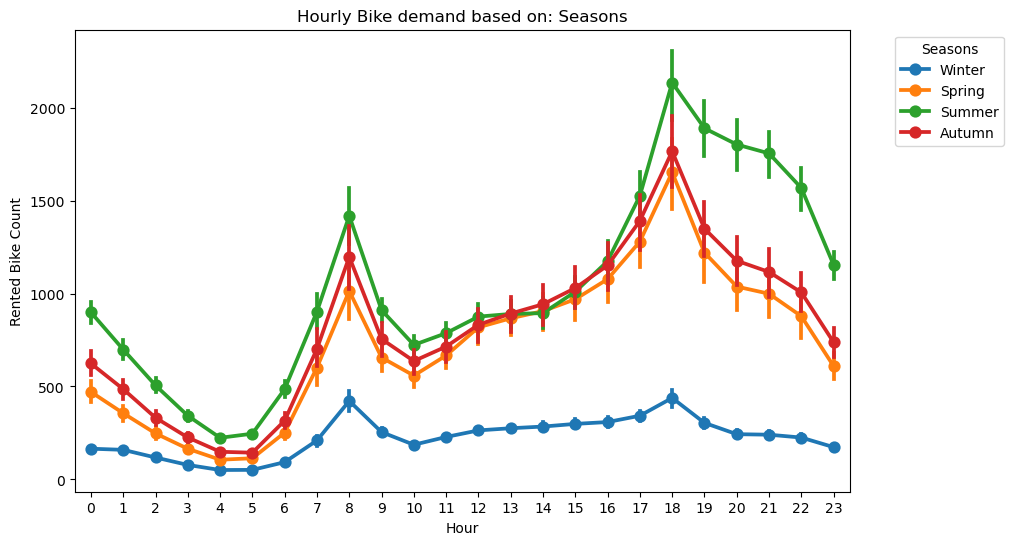

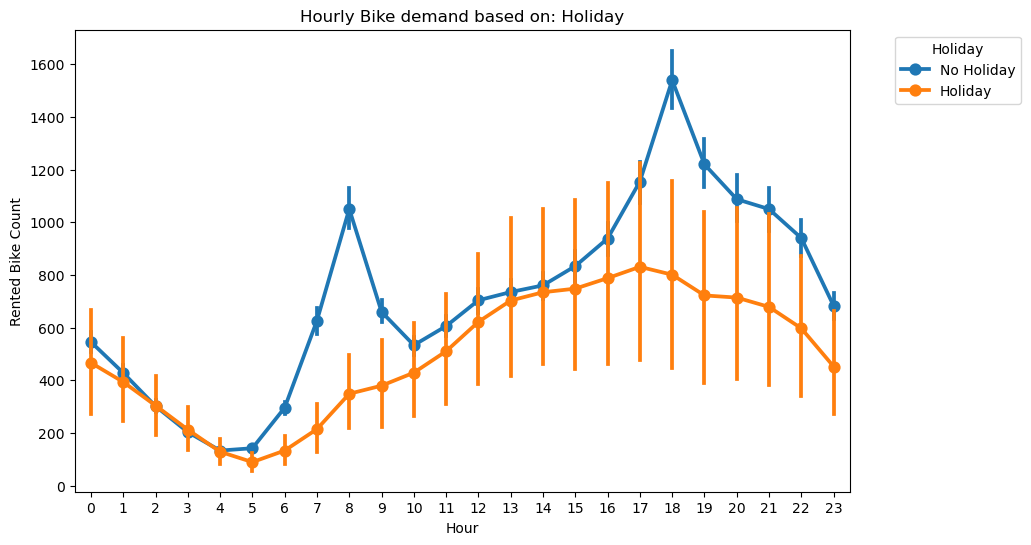

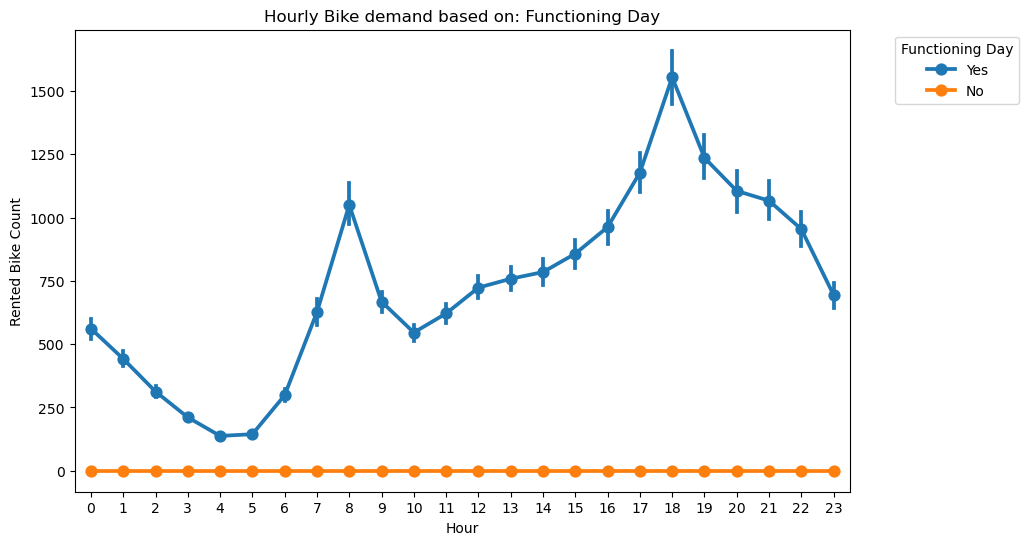

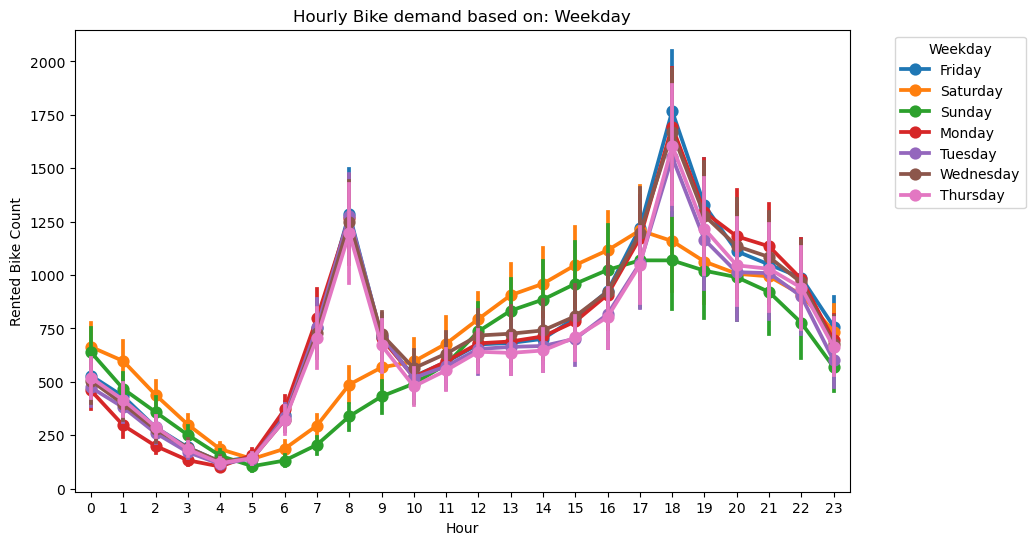

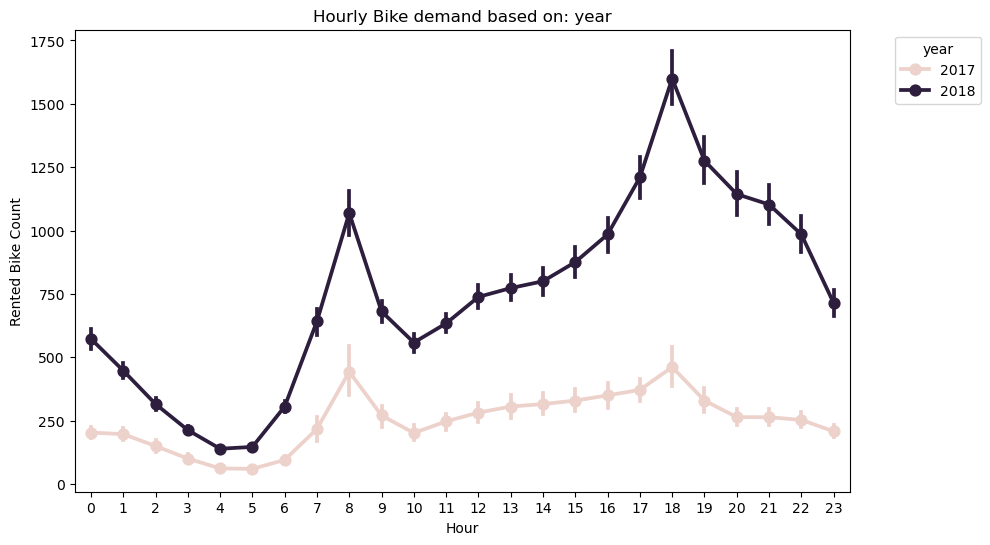

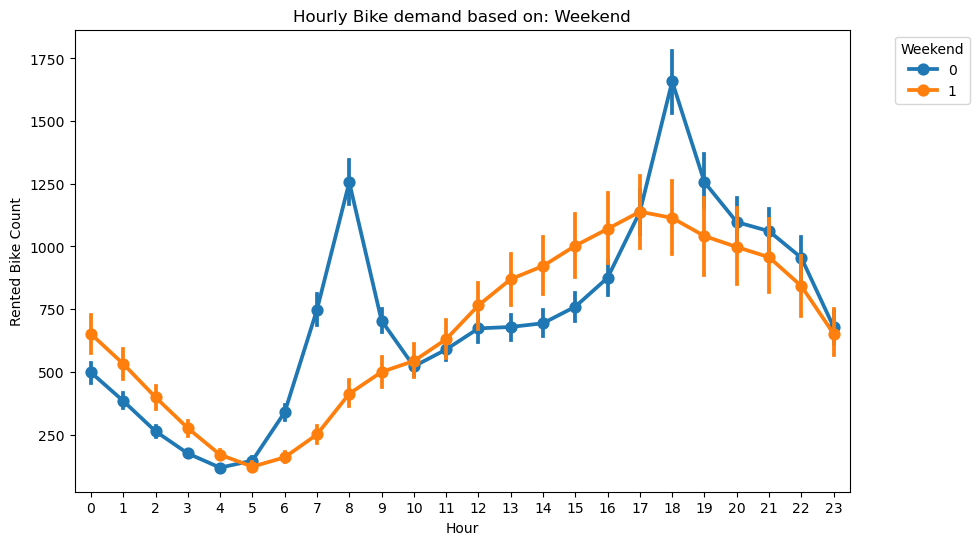

In [17]:
ls = ["Seasons", "Holiday", "Functioning Day", "Weekday", "year", "Weekend"]
for i in ls:
    fig, ax = plt.subplots(figsize=(10,6))
    sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue=i, ax=ax)
    plt.ylabel("Rented Bike Count")
    plt.xlabel("Hour")
    plt.title('Hourly Bike demand based on: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

## Conclusion
    From above plots we see that :
    In winter season there is no significant demand even in the morning or in the evening.
        The Rental Booking happens the most in summers specifically from May to July. Hence, the rental companies needs to plan the staffings required for the maintenance of bikes and smooth running of the business for this period the most.
    On the functional day (i.e No Holiday) there is spike in morning and in evening, but that is not there on Holidays.
    Around 3 months in winter season (i.e December, January & February) there is low demand.
    On weekend almost throught the day there is demand.
    The rental bike is in most demand in the morning from 7 AM to 9 AM and in the evening from 5 PM to 8 PM. Hence, the Rental Bike companies need better planning for the availability of the rental bikes for this time period the most.

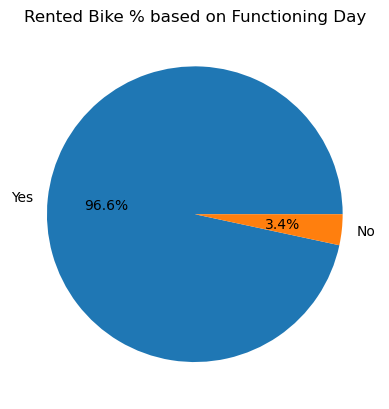

In [18]:
# Rented Bike % based on Functioning Day
plt.pie(df['Functioning Day'].value_counts(),autopct='%1.1f%%',labels=['Yes', 'No'])
plt.title("Rented Bike % based on Functioning Day")
plt.show()

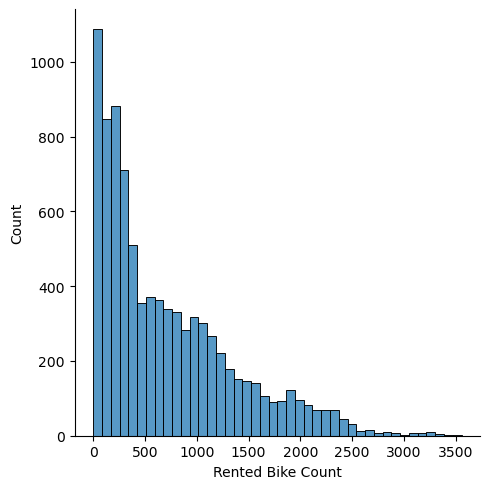

In [19]:
# Rented Bikes Distribution
sns.displot(df['Rented Bike Count'])
plt.show()

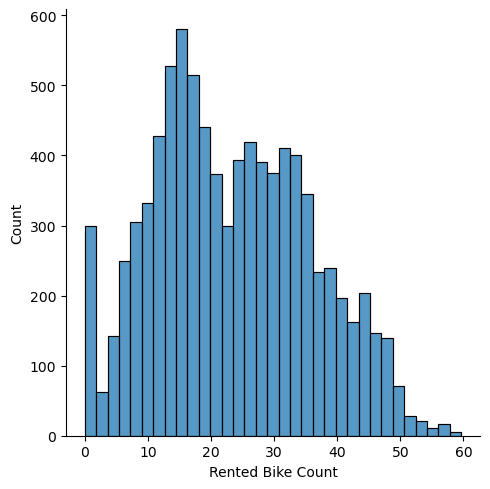

In [20]:
# trying to make Rented Bikes Distribution normal
sns.displot(np.sqrt(df['Rented Bike Count']))
plt.show()

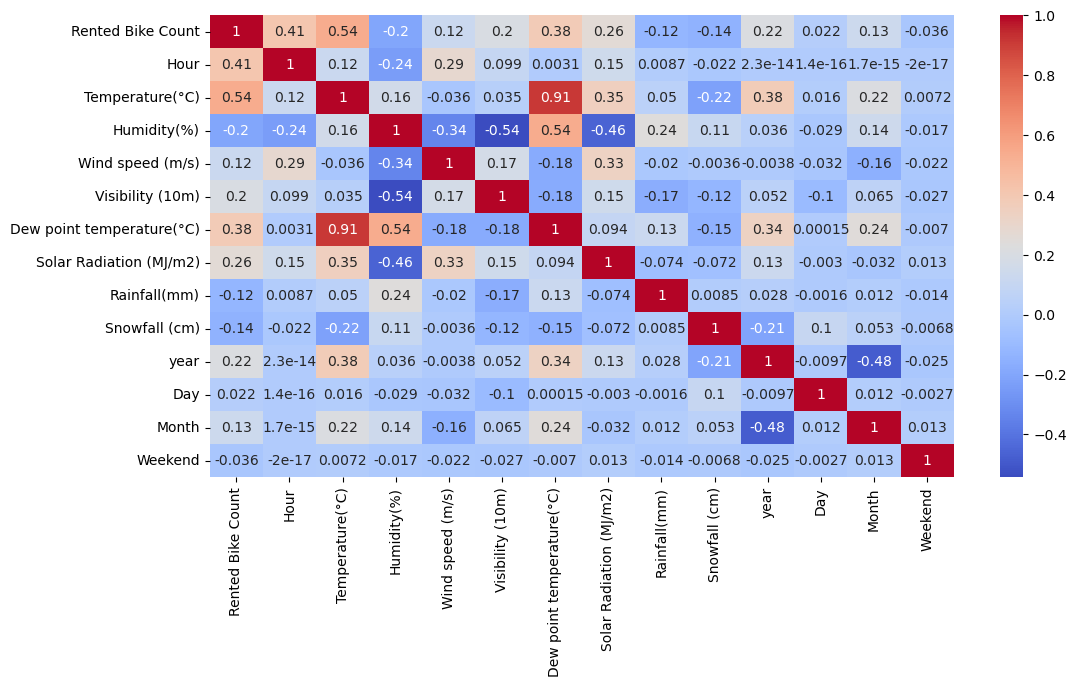

In [21]:
## check for Correlation
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [5]:
## drop Multicollinear features and Non-linear features
df.drop(columns=["Dew point temperature(°C)", "Rainfall(mm)", "Snowfall (cm)", "Wind speed (m/s)","Visibility (10m)", "Weekend"], inplace=True)

#### Encoding

In [6]:
df['Holiday'] = df['Holiday'].map({"No Holiday" : 0, "Holiday" : 1})

In [7]:
df['Functioning Day'] = df['Functioning Day'].map({'Yes':0,"No":1})

In [8]:
df_ohe = pd.get_dummies(df[['Seasons',"Weekday"]], drop_first=True, prefix=["Season","Weekday"],dtype=np.int8)
df_ohe

Season_Spring  Season_Summer  Season_Winter  Weekday_Monday  \
0                 0              0              1               0   
1                 0              0              1               0   
2                 0              0              1               0   
3                 0              0              1               0   
4                 0              0              1               0   
...             ...            ...            ...             ...   
8755              0              0              0               0   
8756              0              0              0               0   
8757              0              0              0               0   
8758              0              0              0               0   
8759              0              0              0               0   

      Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  Weekday_Tuesday  \
0                    0               0                 0                0   
1                    0               0                 0                0   
2                    0               0                 0                0   
3                    0               0                 0                0   
4                    0               0                 0                0   
...                ...             ...               ...              ...   
8755                 0               0                 0                0   
8756                 0               0                 0                0   
8757                 0               0                 0                0   
8758                 0               0                 0                0   
8759                 0               0                 0                0   

      Weekday_Wednesday  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
8755                  0  
8756                  0  
8757                  0  
8758                  0  
8759                  0  

[8760 rows x 9 columns]

In [9]:
df = pd.concat([df, df_ohe], axis=1)
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0                254     0             -5.2           37   
1                204     1             -5.5           38   
2                173     2             -6.0           39   
3                107     3             -6.2           40   
4                 78     4             -6.0           36   

   Solar Radiation (MJ/m2) Seasons  Holiday  Functioning Day Weekday  year  \
0                      0.0  Winter        0                0  Friday  2017   
1                      0.0  Winter        0                0  Friday  2017   
2                      0.0  Winter        0                0  Friday  2017   
3                      0.0  Winter        0                0  Friday  2017   
4                      0.0  Winter        0                0  Friday  2017   

   ...  Month  Season_Spring  Season_Summer  Season_Winter  Weekday_Monday  \
0  ...     12              0              0              1               0   
1  ...     12              0              0              1               0   
2  ...     12              0              0              1               0   
3  ...     12              0              0              1               0   
4  ...     12              0              0              1               0   

   Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  Weekday_Tuesday  \
0                 0               0                 0                0   
1                 0               0                 0                0   
2                 0               0                 0                0   
3                 0               0                 0                0   
4                 0               0                 0                0   

   Weekday_Wednesday  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 21 columns]

In [10]:
df.drop(columns=['Seasons', 'Weekday'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Solar Radiation (MJ/m2)  8760 non-null   float64
 5   Holiday                  8760 non-null   int64  
 6   Functioning Day          8760 non-null   int64  
 7   year                     8760 non-null   int32  
 8   Day                      8760 non-null   int32  
 9   Month                    8760 non-null   int32  
 10  Season_Spring            8760 non-null   int8   
 11  Season_Summer            8760 non-null   int8   
 12  Season_Winter            8760 non-null   int8   
 13  Weekday_Monday           8760 non-null   int8   
 14  Weekday_Saturday        

### Split data for Training & Testing

In [11]:
# Split into Dependent and Independent variable
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

In [12]:
# Split into Train & Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

## Scaling the Data

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training ML Model

In [14]:
# Import Model and Metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
# Mannual Function -> Fit,Predict and Result in both Text and Graph form.

def compute_metrics(y_true, y_pred):
    r2 = round(r2_score(y_true, y_pred), 3)
    mse = round(mean_squared_error(y_true, y_pred), 3)
    rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)), 3)
    return r2, mse, rmse

def plot_regression(y_true, y_pred, model_name):
    sns.regplot(x=y_true, y=y_pred, line_kws={'color':'orange'})
    plt.title(f"{model_name} Truth vs Prediction")
    plt.xlabel("Ground Truth")
    plt.ylabel("Prediction")
    plt.show()

def plot_comparison(y_true, y_pred):
    plt.plot(np.array(y_true[:50]), label='Actual')
    plt.plot(np.array(y_pred[:50]), label='Predicted')
    plt.title("Actual & Predicted Bike Count")
    plt.legend()
    plt.show()

def model_result(models, X_train, X_test, y_train, y_test):
    """Function Parameters :-
        model :- (Model_name, Model_object)
        X_train :- X_train
        X_test :- X_test
        y_train :- y_train
        y_test :- y_test
        
        Output :-
        _________________________Model_Name__________________________
        Training Result
        R2score : 0.0
        Mean Squared Error : 0.0
        Root Mean Squared Error : 0.0
        
        Testing Result
        R2score : 0.0
        Mean Squared Error : 0.0
        Root Mean Squared Error : 0.0
        
                            Graph
        1. Regression Plot  ->  Truth vs Prediction
        
        2. Line Plot  ->  Actual & Predicted Bike Count

        Return :-
                  model_name, train_r2, test_r2, train_rmse, test_rmse        
    """
    print()
    model_name, model = models
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # call compute_metrics function
    train_r2, train_mse, train_rmse = compute_metrics(y_train, y_train_pred)
    test_r2, test_mse, test_rmse = compute_metrics(y_test, y_test_pred)
    
    print(model_name.center(70, "_"))
    print("Training Result")
    print(f"R2score : {train_r2}\nMean Squared Error : {train_mse}\nRoot Mean Squared Error : {train_rmse}\n")
    print("Testing Result")
    print(f"R2score : {test_r2}\nMean Squared Error : {test_mse}\nRoot Mean Squared Error : {test_rmse}\n")

    # call plot_regression function
    plot_regression(y_test, y_test_pred, model_name)
    
    # call plot_comparison function
    plot_comparison(y_test, y_test_pred)
    
    print("-" * 80)
    return train_r2, test_r2, train_rmse, test_rmse


___________________________LinearRegression___________________________
Training Result
R2score : 0.55
Mean Squared Error : 189330.559
Root Mean Squared Error : 435.121

Testing Result
R2score : 0.538
Mean Squared Error : 183674.737
Root Mean Squared Error : 428.573



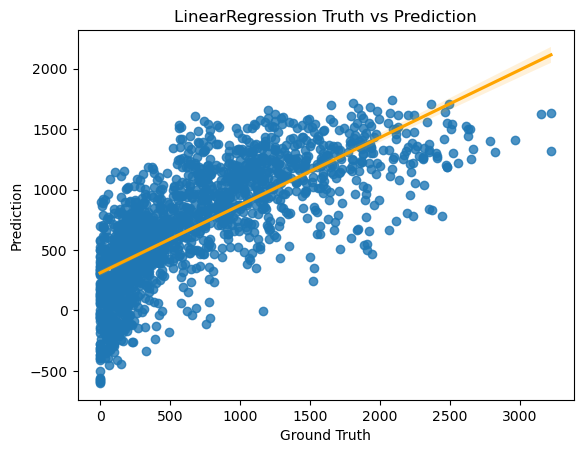

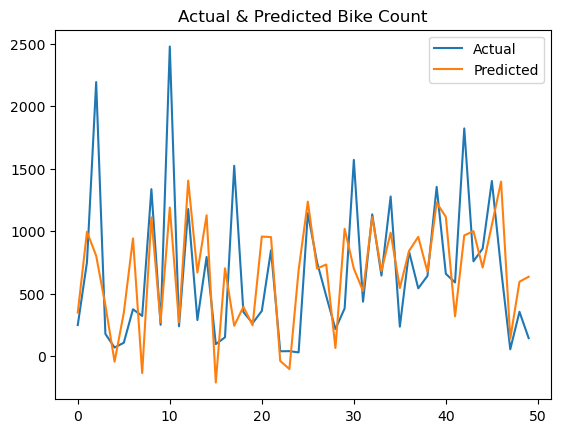

--------------------------------------------------------------------------------

________________________________Ridge_________________________________
Training Result
R2score : 0.55
Mean Squared Error : 189330.953
Root Mean Squared Error : 435.122

Testing Result
R2score : 0.538
Mean Squared Error : 183653.559
Root Mean Squared Error : 428.548



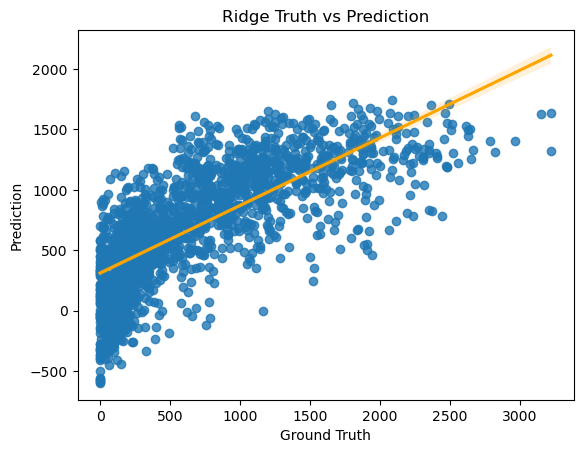

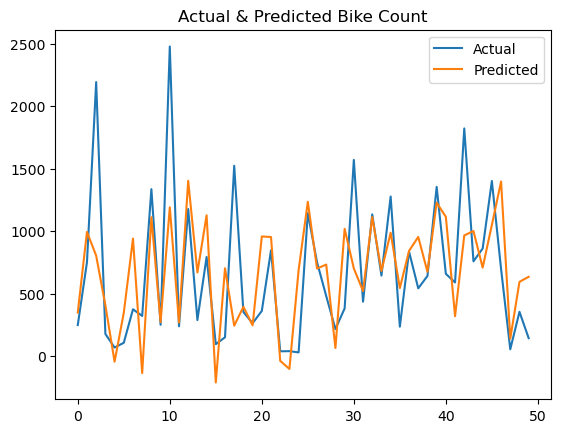

--------------------------------------------------------------------------------

________________________________Lasso_________________________________
Training Result
R2score : 0.549
Mean Squared Error : 189763.838
Root Mean Squared Error : 435.619

Testing Result
R2score : 0.539
Mean Squared Error : 183418.183
Root Mean Squared Error : 428.273



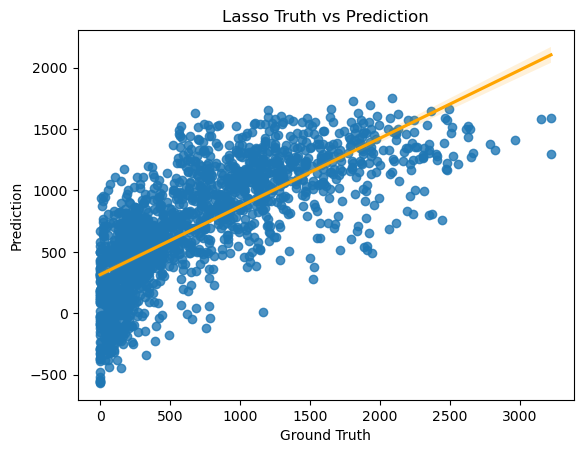

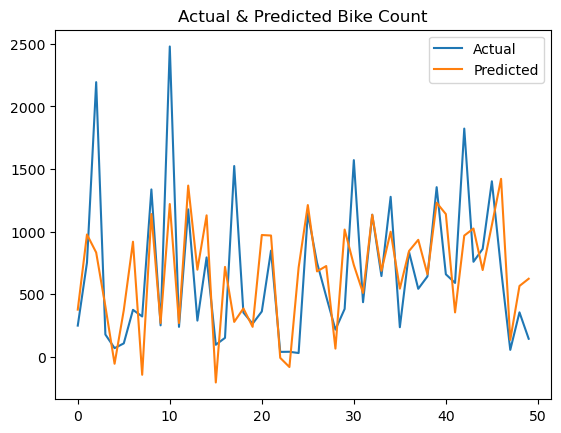

--------------------------------------------------------------------------------

______________________________ElasticNet______________________________
Training Result
R2score : 0.491
Mean Squared Error : 214198.148
Root Mean Squared Error : 462.815

Testing Result
R2score : 0.492
Mean Squared Error : 202274.132
Root Mean Squared Error : 449.749



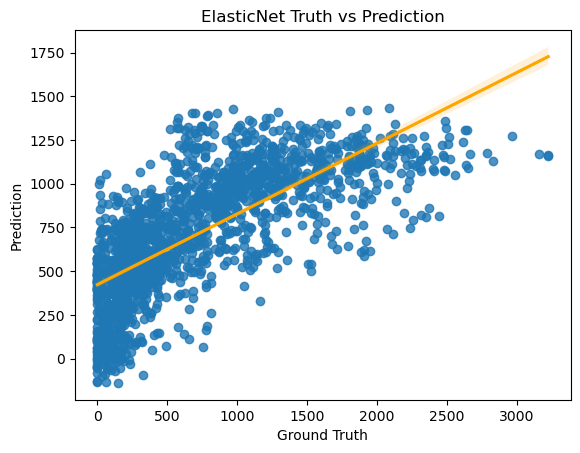

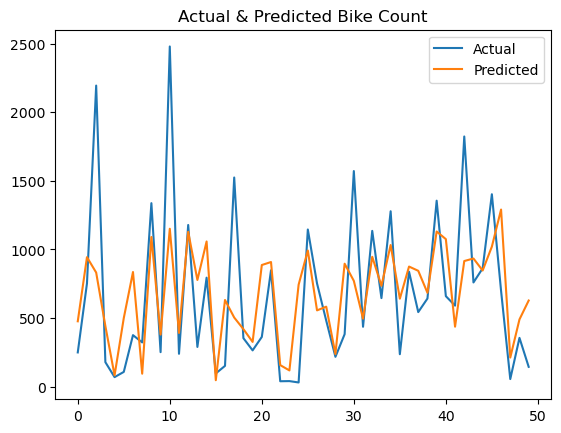

--------------------------------------------------------------------------------

_____________________________RandomForest_____________________________
Training Result
R2score : 0.989
Mean Squared Error : 4489.351
Root Mean Squared Error : 67.003

Testing Result
R2score : 0.922
Mean Squared Error : 31089.768
Root Mean Squared Error : 176.323



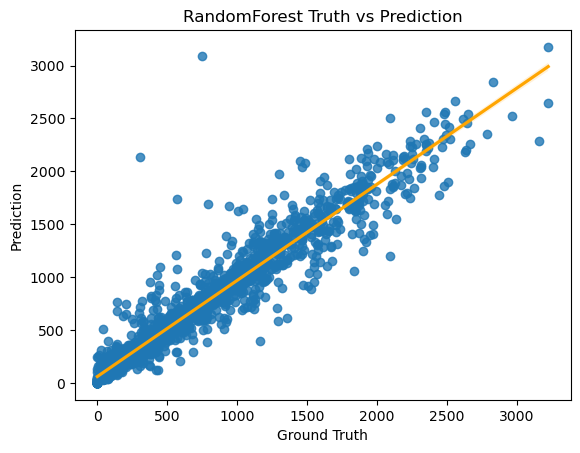

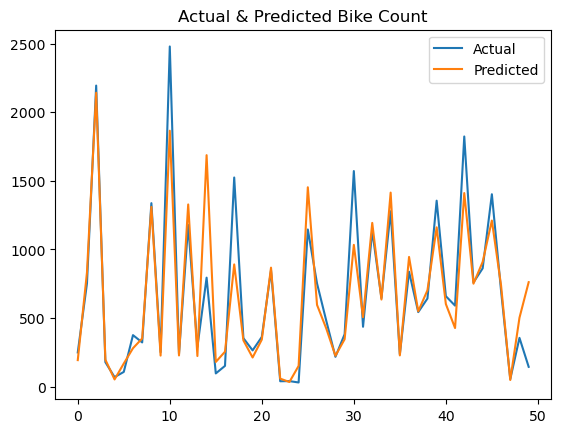

--------------------------------------------------------------------------------

______________________________KNeighbors______________________________
Training Result
R2score : 0.87
Mean Squared Error : 54558.856
Root Mean Squared Error : 233.578

Testing Result
R2score : 0.773
Mean Squared Error : 90218.705
Root Mean Squared Error : 300.364



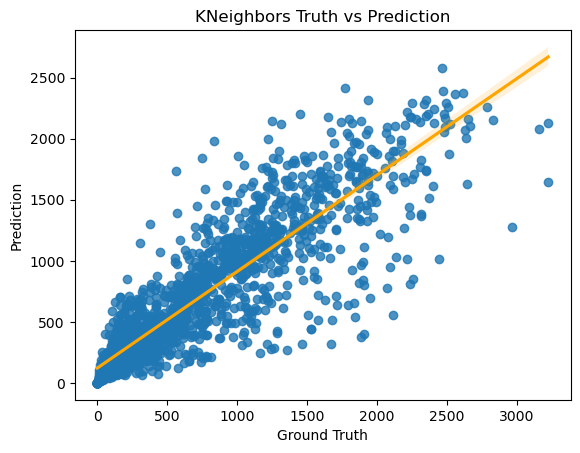

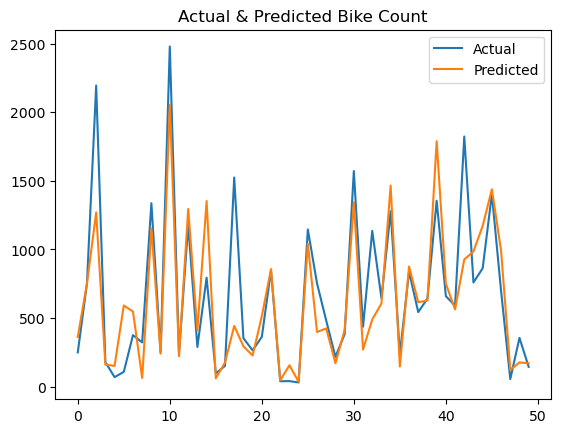

--------------------------------------------------------------------------------

_________________________________XGB__________________________________
Training Result
R2score : 0.987
Mean Squared Error : 5306.864
Root Mean Squared Error : 72.848

Testing Result
R2score : 0.937
Mean Squared Error : 24903.272
Root Mean Squared Error : 157.808



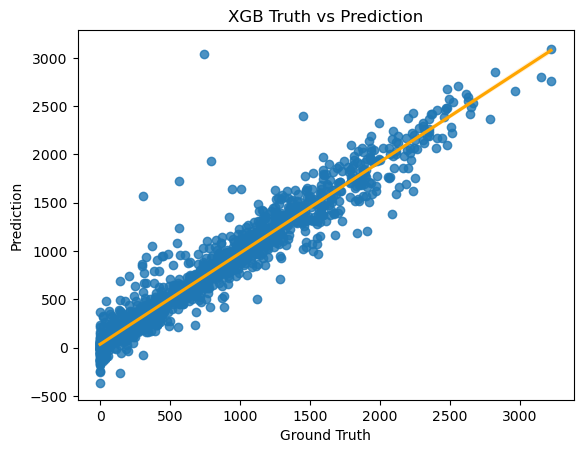

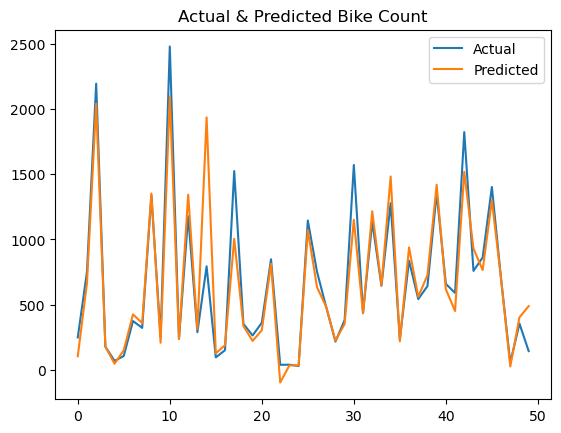

--------------------------------------------------------------------------------


In [16]:
models_list = [
    ("LinearRegression", LinearRegression()),
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("ElasticNet", ElasticNet()),
    ("RandomForest", RandomForestRegressor()),
    ("KNeighbors", KNeighborsRegressor()),
    ("XGB", XGBRegressor())
]

comparison_dict = {"Training_Accuracy" : [], "Testing_Accuracy" : [], "Training_RMSE" : [], "Testing_RMSE" : []}

for model in models_list:
    train_r2, test_r2, train_rmse, test_rmse = model_result(model, X_train, X_test, y_train, y_test)
    comparison_dict['Training_Accuracy'].append(train_r2)
    comparison_dict['Testing_Accuracy'].append(test_r2)
    comparison_dict['Training_RMSE'].append(train_rmse)
    comparison_dict['Testing_RMSE'].append(test_rmse)

In [17]:
model_comparison_df = pd.DataFrame(comparison_dict, index = [i[0] for i in models_list])
model_comparison_df

Training_Accuracy  Testing_Accuracy  Training_RMSE  \
LinearRegression              0.550             0.538        435.121   
Ridge                         0.550             0.538        435.122   
Lasso                         0.549             0.539        435.619   
ElasticNet                    0.491             0.492        462.815   
RandomForest                  0.989             0.922         67.003   
KNeighbors                    0.870             0.773        233.578   
XGB                           0.987             0.937         72.848   

                  Testing_RMSE  
LinearRegression       428.573  
Ridge                  428.548  
Lasso                  428.273  
ElasticNet             449.749  
RandomForest           176.323  
KNeighbors             300.364  
XGB                    157.808

## Best Model --> XGBRegressor

## Hyper parameter Tuning

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
xgb = XGBRegressor()

In [93]:
grid_params = [
    {
        'n_estimators' : [400, 600, 800],
        'max_depth' : [7, 8, 9, 10],
        'learning_rate' : [0.05, 0.1],
        'subsample' : [0.3, 0.4, 0.8],
        'colsample_bytree' : [0.4, 0.6, 0.8],
        'colsample_bylevel' : [0.5, 0.7, 0.8],
    }
]

In [94]:
grid_cv = GridSearchCV(xgb, grid_params, scoring='neg_mean_squared_error', cv=2, verbose=1, return_train_score=True, n_jobs=-1)
grid_cv.fit(X_train, y_train)

Fitting 2 folds for each of 648 candidates, totalling 1296 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid=[{'colsample_bylevel': [0.5, 0.7, 0.8],
                          'colsample_bytree': [0.4, 0.6, 0.8],
                          'learning_rate': [0.05, 0.1],
                          'max_depth': [7, 8, 9, 10],
                          'n_estimators': [400, 600, 800],
                          'subsample': [0.3, 0.4, 0.8]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [95]:
grid_cv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.5, colsample_bynode=None, colsample_bytree=0.8,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=-1,
             num_parallel_tree=None, ...)

In [96]:
grid_cv.best_params_

{'colsample_bylevel': 0.5,
 'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 8,
 'n_estimators': 800,
 'subsample': 0.8}

Training Result
R2score : 0.999
Mean Squared Error : 323.931
Root Mean Squared Error : 17.998

Testing Result
R2score : 0.952
Mean Squared Error : 19250.776
Root Mean Squared Error : 138.747



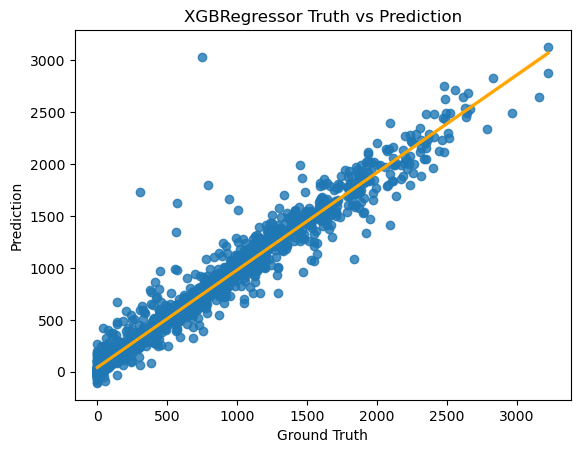

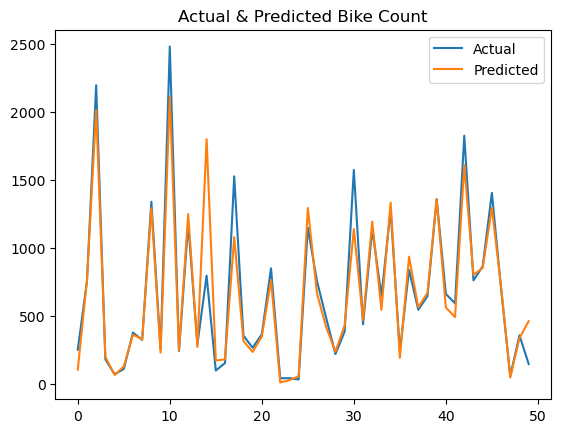

In [98]:
xgb_regressor = XGBRegressor(colsample_bylevel= 0.5, colsample_bytree= 0.8, learning_rate= 0.05, max_depth= 8, n_estimators= 800, subsample= 0.8)
xgb_regressor.fit(X_train, y_train)
y_hat_train = xgb_regressor.predict(X_train)
y_hat_test = xgb_regressor.predict(X_test)

train_r2, train_mse, train_rmse = compute_metrics(y_train, y_hat_train)
test_r2, test_mse, test_rmse = compute_metrics(y_test, y_hat_test)

print("Training Result")
print(f"R2score : {train_r2}\nMean Squared Error : {train_mse}\nRoot Mean Squared Error : {train_rmse}\n")
print("Testing Result")
print(f"R2score : {test_r2}\nMean Squared Error : {test_mse}\nRoot Mean Squared Error : {test_rmse}\n")

plot_regression(y_test, y_hat_test, "XGBRegressor")

plot_comparison(y_test, y_hat_test)

# Save the Model

In [99]:
import pickle

In [100]:
with open('xgb_regressor.pkl', 'wb') as f:
    pickle.dump(xgb_regressor, f)

## Conclusion
    The project successfully demonstrated the feasibility of using machine learning techniques to predict Bike Demand in Seoul.

#### Some of the key points are:-
    High demand in the morning and evening.
    Less Demand in the winter season.
    Highest demand in june.
    Found multicollinearity between temperature and dew point temperature.
    Perform LinearRegression, Ridge, Lasso, ElasticNet, RandomForest, KNeighbors, XGB.
    The accuracy of the Random Forest Regressor and XG Boost is 92.2 percent and 93.7 percent, respectively.Hence i choose XGBRegressor for hyper parameter tuning accuracy get increased by 2% with testing accuracy 95.2%.